In [1]:
import cv2
from matplotlib import pyplot as plt
from helper import *
from scipy import spatial

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-large-stage1 and are newly initialized: ['encoder.pooler.dense.bias', 'encoder.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [2]:
def calculate_embeddings(filename):
    
    img = cv2.cvtColor(cv2.imread(filename), cv2.COLOR_BGR2RGB)
    
    embedder = Runner(filename=filename)
    
    face_location, crops = embedder.detect_face(img)
    print("Number of Faces detected:", len(face_location))
    
    img_draw = draw_rectangle(img, face_location)
    
    emb = embedder.embeddings(crops)
    
    return img_draw, emb

In [11]:
img, emb = calculate_embeddings("/Users/arpitsharma/Downloads/TBT/TBT 2023-1215.jpg")

2/2 [==============================] - 0s 2ms/step
Number of Faces detected: 1
1/1 [==============================] - 1s 684ms/step


In [19]:
img1, emb1 = calculate_embeddings("/Users/arpitsharma/Downloads/TBT/TBT 2023-1265.jpg")

5/5 [==============================] - 0s 7ms/step
Number of Faces detected: 2
1/1 [==============================] - 1s 550ms/step


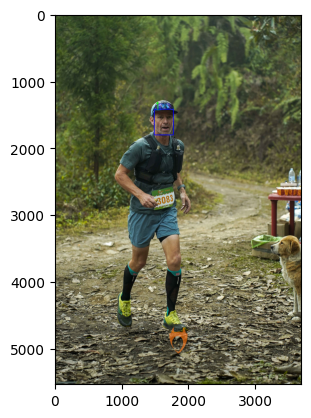

In [20]:
plt.imshow(img)

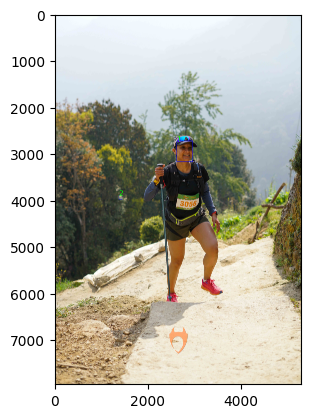

In [21]:
plt.imshow(img1)

In [22]:
spatial.distance.cosine(emb[0], emb1[0])

0.8025374263525009

In [16]:
from mtcnn.mtcnn import MTCNN


In [17]:
help(MTCNN)

Help on class MTCNN in module mtcnn.mtcnn:

class MTCNN(builtins.object)
 |  MTCNN(weights_file: str = None, min_face_size: int = 20, steps_threshold: list = None, scale_factor: float = 0.709)
 |  
 |  Allows to perform MTCNN Detection ->
 |      a) Detection of faces (with the confidence probability)
 |      b) Detection of keypoints (left eye, right eye, nose, mouth_left, mouth_right)
 |  
 |  Methods defined here:
 |  
 |  __init__(self, weights_file: str = None, min_face_size: int = 20, steps_threshold: list = None, scale_factor: float = 0.709)
 |      Initializes the MTCNN.
 |      :param weights_file: file uri with the weights of the P, R and O networks from MTCNN. By default it will load
 |      the ones bundled with the package.
 |      :param min_face_size: minimum size of the face to detect
 |      :param steps_threshold: step's thresholds values
 |      :param scale_factor: scale factor
 |  
 |  detect_faces(self, img) -> list
 |      Detects bounding boxes from the specifie